In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
#Load data
transactions = pd.read_csv('/Users/djdit/OneDrive - University of South Florida/Project/Data/firstfile.csv')
mediaInvestment = pd.read_csv('/Users/djdit/OneDrive - University of South Florida/Project/Data/MediaInvestment.csv')
nps_score = pd.read_csv('/Users/djdit/OneDrive - University of South Florida/Project/Data/MonthlyNPSscore.csv')

In [67]:
transactions.head()

,Unnamed: 0,Date,Sales_name,gmv_new,units,product_mrp,discount,product_category,product_subcategory,product_vertical
0,1,2015-07-01,No Promotion,3040.0,1,3650.0,610.0,EntertainmentSmall,HomeAudio,HomeAudioSpeaker
1,2,2015-07-01,No Promotion,310.0,1,400.0,90.0,EntertainmentSmall,Speaker,LaptopSpeaker
2,3,2015-07-01,No Promotion,1999.0,1,7999.0,6000.0,GamingHardware,GamingAccessory,GamePad
3,4,2015-07-01,No Promotion,139.0,1,700.0,561.0,EntertainmentSmall,TVVideoSmall,RemoteControl
4,5,2015-07-01,No Promotion,99.0,1,700.0,601.0,EntertainmentSmall,TVVideoSmall,RemoteControl


In [68]:
# drop "Unnamed: 0" column because it is duplicate index from source data file
transactions.drop('Unnamed: 0', axis=1, inplace=True)

print("transactions dtypes: \n", transactions.dtypes)

transactions dtypes: 
 Date                    object
Sales_name              object
gmv_new                float64
units                    int64
product_mrp            float64
discount               float64
product_category        object
product_subcategory     object
product_vertical        object
dtype: object


In [69]:
#Convert Date from object to datetime 
transactions['Date'] = pd.to_datetime(transactions['Date'], format='%Y-%m-%d')

In [70]:
transactions.head()

,Date,Sales_name,gmv_new,units,product_mrp,discount,product_category,product_subcategory,product_vertical
0,2015-07-01,No Promotion,3040.0,1,3650.0,610.0,EntertainmentSmall,HomeAudio,HomeAudioSpeaker
1,2015-07-01,No Promotion,310.0,1,400.0,90.0,EntertainmentSmall,Speaker,LaptopSpeaker
2,2015-07-01,No Promotion,1999.0,1,7999.0,6000.0,GamingHardware,GamingAccessory,GamePad
3,2015-07-01,No Promotion,139.0,1,700.0,561.0,EntertainmentSmall,TVVideoSmall,RemoteControl
4,2015-07-01,No Promotion,99.0,1,700.0,601.0,EntertainmentSmall,TVVideoSmall,RemoteControl


In [71]:
transactions.dtypes

Date                   datetime64[ns]
Sales_name                     object
gmv_new                       float64
units                           int64
product_mrp                   float64
discount                      float64
product_category               object
product_subcategory            object
product_vertical               object
dtype: object

In [72]:
mediaInvestment.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,7,17.1,0.2,2.5,7.4,0.0,1.3,0.5,5.0,NaN,NaN
1,2015,8,5.1,0.0,1.3,1.1,0.0,0.1,0.1,2.5,NaN,NaN
2,2015,9,96.3,3.9,1.4,62.8,0.6,16.4,5.0,6.2,NaN,NaN
3,2015,10,170.2,6.1,12.6,84.7,3.4,24.4,7.0,31.9,NaN,NaN
4,2015,11,51.2,4.2,1.3,14.2,0.2,19.6,6.6,5.2,NaN,NaN


In [73]:
mediaInvestment.dtypes

Year                   int64
Month                  int64
Total Investment     float64
TV                   float64
Digital              float64
Sponsorship          float64
Content Marketing    float64
Online marketing     float64
 Affiliates          float64
SEM                  float64
Radio                float64
Other                float64
dtype: object

In [89]:
#Merge year and month and format as datetime to be uniform with other tables

mediaInvestment['Date'] = mediaInvestment['Year'].map(str) + "-" + mediaInvestment['Month'].map(str)

#Drop original Date & Month
mediaInvestment.drop('Year', axis=1, inplace=True)
mediaInvestment.drop('Month', axis=1, inplace=True)

In [90]:
#Change new Date column to datetime dtype
mediaInvestment['Date'] = pd.to_datetime(mediaInvestment['Date'], format='%Y-%m')

In [93]:
mediaInvestment.head()

,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,Date
0,17.1,0.2,2.5,7.4,0.0,1.3,0.5,5.0,NaN,NaN,2015-07-01
1,5.1,0.0,1.3,1.1,0.0,0.1,0.1,2.5,NaN,NaN,2015-08-01
2,96.3,3.9,1.4,62.8,0.6,16.4,5.0,6.2,NaN,NaN,2015-09-01
3,170.2,6.1,12.6,84.7,3.4,24.4,7.0,31.9,NaN,NaN,2015-10-01
4,51.2,4.2,1.3,14.2,0.2,19.6,6.6,5.2,NaN,NaN,2015-11-01


In [94]:
nps_score.head()

,Date,NPS
0,2015-07-01,54.6
1,2015-08-01,60.0
2,2015-09-01,46.9
3,2015-10-01,44.4
4,2015-11-01,47.0


In [99]:
nps_score.dtypes

Date    datetime64[ns]
NPS            float64
dtype: object

In [100]:
nps_score['Date'] = pd.to_datetime(nps_score['Date'], format='%m/%d/%Y')

In [101]:
nps_score.head()

,Date,NPS
0,2015-07-01,54.6
1,2015-08-01,60.0
2,2015-09-01,46.9
3,2015-10-01,44.4
4,2015-11-01,47.0


In [102]:
print(transactions.shape)
print(mediaInvestment.shape)
print(nps_score.shape)

(1578079, 9)
(12, 11)
(12, 2)


In [103]:
print("transactions nulls: \n", transactions.isnull().sum())
print("\n media nulls: \n", mediaInvestment.isnull().sum(), "\n")
print("\n nps nulls: \n", nps_score.isnull().sum(), "\n")

transactions nulls: 
 Date                   0
Sales_name             0
gmv_new                0
units                  0
product_mrp            0
discount               0
product_category       0
product_subcategory    0
product_vertical       0
dtype: int64

 media nulls: 
 Total Investment     0
TV                   0
Digital              0
Sponsorship          0
Content Marketing    0
Online marketing     0
 Affiliates          0
SEM                  0
Radio                9
Other                9
Date                 0
dtype: int64 


 nps nulls: 
 Date    0
NPS     0
dtype: int64 



radio and other nulls are blank in source data. Will replace with 0 for $0 dollars spent since we don't want to drop the row and we want to see if radio or other had impact on sales.

In [104]:
mediaInvestment['Radio'] = mediaInvestment['Radio'].replace(np.nan, 0)
mediaInvestment['Other'] = mediaInvestment['Other'].replace(np.nan, 0)

In [105]:
print("\n media nulls: \n", mediaInvestment.isnull().sum(), "\n")


 media nulls: 
 Total Investment     0
TV                   0
Digital              0
Sponsorship          0
Content Marketing    0
Online marketing     0
 Affiliates          0
SEM                  0
Radio                0
Other                0
Date                 0
dtype: int64 



In [106]:
#Descriptive numerical statistics
transactions.describe()

,gmv_new,units,product_mrp,discount
count,1.578079e+06,1.578079e+06,1.578079e+06,1.578079e+06
mean,2.461679e+03,1.021809e+00,4.257890e+03,1.796212e+03
std,5.640023e+03,2.493014e-01,8.793679e+03,4.276790e+03
min,1.000000e+01,1.000000e+00,4.900000e+01,1.697040e-02
25%,3.390000e+02,1.000000e+00,8.000000e+02,3.100000e+02
50%,7.490000e+02,1.000000e+00,1.600000e+03,7.000000e+02
75%,1.998000e+03,1.000000e+00,3.499000e+03,1.549000e+03
max,2.269470e+05,5.000000e+01,4.200000e+05,4.183530e+05


In [107]:
#Object data
print("date count", transactions.Date.count())
print("date unique count ", transactions.Date.nunique())
print("date range ", transactions.Date.min(), " ", transactions.Date.max(), "\n")


print("sale name count ", transactions.Sales_name.count())
print("sale name unique count ", transactions.Sales_name.nunique())
print("sale name ", transactions.Sales_name.unique(), "\n")

print("Category count ", transactions.product_category.count())
print("Category unique count ", transactions.product_category.nunique(), "\n")
print("Category ", transactions.product_category.unique(), "\n")

print("Subcategory count ", transactions.product_subcategory.count())
print("Subcategory unique count ", transactions.product_subcategory.nunique(), "\n")
print("Subcategory ", transactions.product_subcategory.unique(), "\n")

print("Vertical count ", transactions.product_vertical.count())
print("Vertical unique count ", transactions.product_vertical.nunique())
print("Vertical ", transactions.product_vertical.unique())

date count 1578079
date unique count  360
date range  2015-07-01 00:00:00   2016-06-30 00:00:00 

sale name count  1578079
sale name unique count  13
sale name  ['No Promotion' 'Eid & Rathayatra sale' 'Independence Sale'
 'Rakshabandhan Sale' 'Daussera sale' 'Big Diwali Sale'
 'Christmas & New Year Sale' 'Republic Day' 'BED' "Valentine's Day" 'FHSD'
 'BSD-5' 'Pacman'] 

Category count  1578079
Category unique count  5 

Category  ['EntertainmentSmall' 'GamingHardware' 'CameraAccessory' 'GameCDDVD'
 'Camera'] 

Subcategory count  1578079
Subcategory unique count  14 

Subcategory  ['HomeAudio' 'Speaker' 'GamingAccessory' 'TVVideoSmall' 'CameraStorage'
 'AudioMP3Player' 'Game' 'CameraAccessory' 'Camera' 'AmplifierReceiver'
 'GamingConsole' 'AudioAccessory' 'HomeTheatre' 'GameMembershipCards'] 

Vertical count  1578079
Vertical unique count  72
Vertical  ['HomeAudioSpeaker' 'LaptopSpeaker' 'GamePad' 'RemoteControl'
 'CameraStorageMemoryCard' 'AudioMP3Player' 'SelectorBox' 'PhysicalGame'
 

<AxesSubplot:>

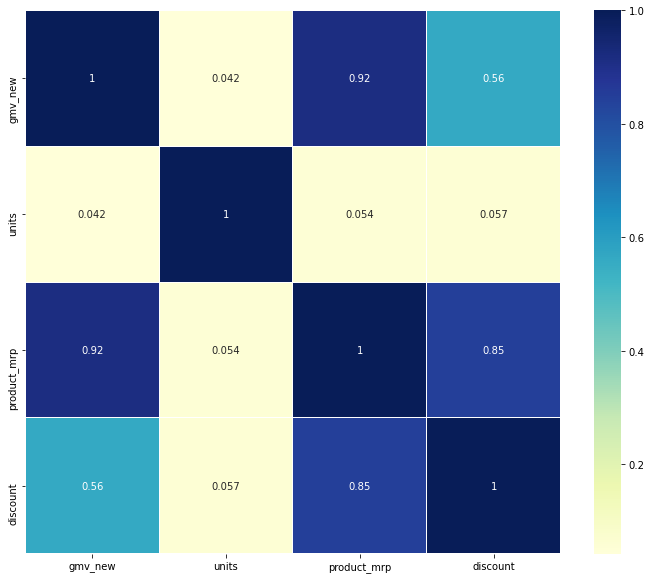

In [108]:
# Check correlation
transactions_corr = transactions.corr()
plt.subplots(figsize=(12,10))
sns.heatmap(transactions_corr, cmap='YlGnBu', linewidth=.005, annot=True)